In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [6]:
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [11]:
results = search_images("grizzly bear", max_images=1)
results

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


(#1) ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg']

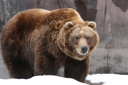

In [10]:
from fastdownload import download_url
from fastai.vision.all import *

dest = 'images/grizzly.jpg'
download_url(results[0], dest)

im = Image.open(dest)
im.to_thumb(128, 128)

In [19]:
from time import sleep
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(urls=search_images(f"{o} bear"), dest=dest)
        sleep(10)
        

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


In [27]:
failed = verify_images(get_image_files(path))
print(len(failed))
failed.map(Path.unlink)

7


(#7) [None,None,None,None,None,None,None]

In [34]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.2, 42),
    get_y = parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
)

In [35]:
dls = bears.dataloaders(path)

In [53]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms(2))
dls = bears.dataloaders(path)

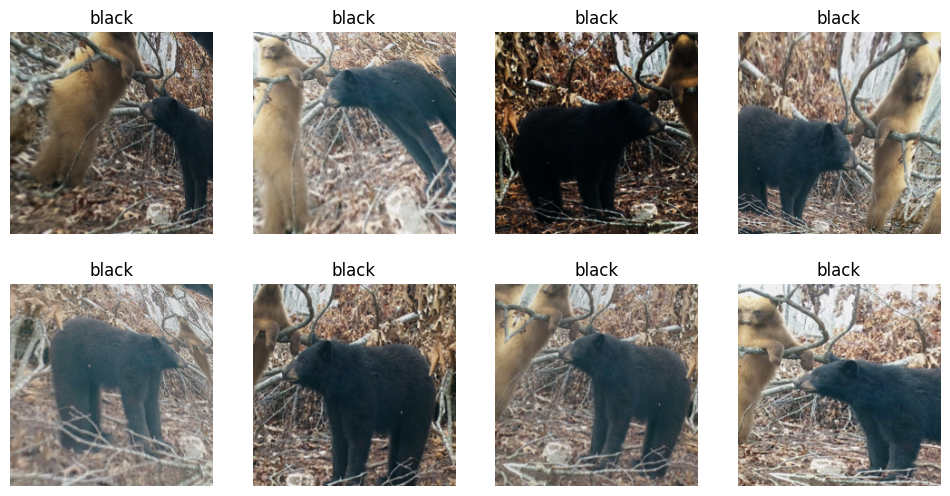

In [54]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [55]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.739030,0.863951,0.320000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.419180,0.275380,0.060000,00:05
1,0.304287,0.249263,0.020000,00:05
2,0.220769,0.326846,0.020000,00:06
3,0.166938,0.367569,0.020000,00:06
4,0.146146,0.379777,0.020000,00:05
5,0.120332,0.370354,0.020000,00:05


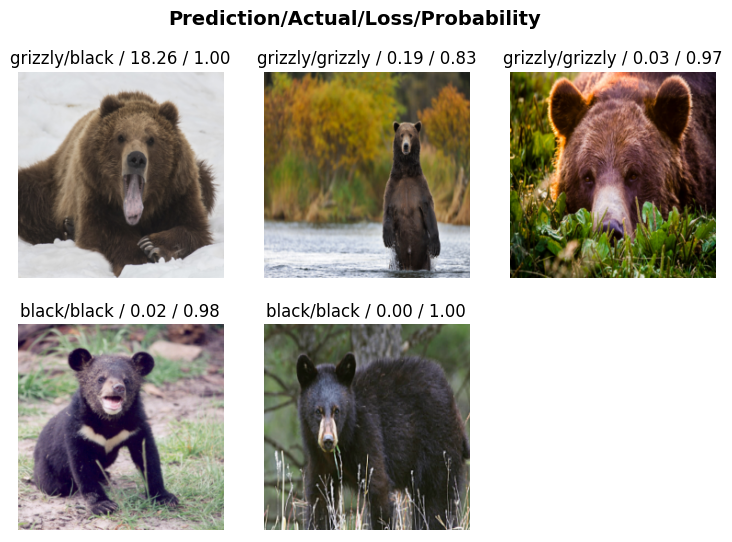

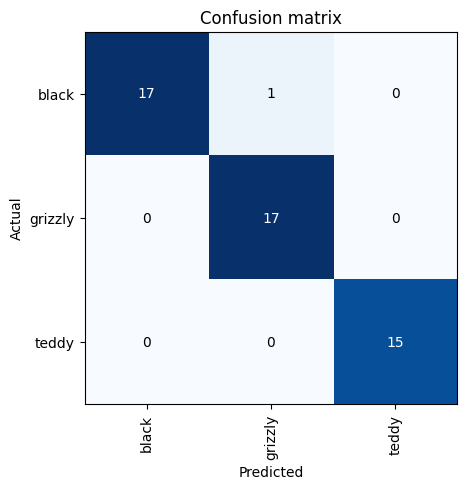

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5)
interp.plot_confusion_matrix()

In [57]:
learn.export()

In [58]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [60]:
learn_inf = load_learner(path/'export.pkl')

In [62]:
print(learn_inf.predict('images/grizzly.jpg'))
print(learn_inf.dls.vocab)

('grizzly', tensor(1), tensor([9.2642e-09, 1.0000e+00, 4.2499e-08]))
['black', 'grizzly', 'teddy']
